In [52]:
from ipyleaflet import Map, Marker, MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [53]:
def load_data(filename):
    df = pd.read_json(filename)
    df['crash_date'] = pd.to_datetime(df['crash_date'], format='%Y%m%d')
    return df

In [54]:
data_2018 = load_data('data/dtp-data-2018.json')
data_2017 = load_data('data/dtp-data-2017.json')
data_2017

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,83,Кабардино-Балкарская Республика,,Кенделен-Зап.Кинжал,Региональная или межмуниципальная дорога общег...,83648415,"СКФО, Кабардино-Балкарская Республика, Эльбрус...",Столкновение,2018-01-01,2020-03-25 02:50:00,Неправильный выбор дистанции,1,0,2,6,43.589500,43.200277
1,20,Воронежская область,,"Воронеж - Луганск (госгранца), через Острогожс...",Региональная или межмуниципальная дорога общег...,20631000,"ЦФО, Воронежская область, Острогожский район",Опрокидывание,2018-01-01,2020-03-25 02:35:00,Нарушение правил расположения ТС на проезжей ч...,1,0,1,2,50.818300,39.133100
2,79,Республика Адыгея,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,79703000,"ЮФО, Республика Адыгея, Адыгейск",Наезд на препятствие,2018-01-01,2020-03-25 02:35:00,Другие нарушения ПДД водителями,2,0,1,3,44.825800,39.224700
3,3,Краснодарский край,,ПОДЪЕЗД К Г.АНАПА,Региональная или межмуниципальная дорога общег...,03703000,"ЮФО, Краснодарский край, Анапский район, Анапа",Столкновение,2018-01-01,2020-03-25 02:30:00,Нарушение требований сигналов светофора,1,0,2,2,44.905600,37.333100
4,82,Республика Дагестан,Р-215,Астрахань - Кочубей - Кизляр - Махачкала,Федеральная дорога общего пользования,82607000,"СКФО, Республика Дагестан, Бабаюртовский район",Наезд на пешехода,2018-01-01,2020-03-25 02:30:00,Нахождение на проезжей части без цели её перех...,0,2,1,3,43.315800,47.430800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161132,33,Кировская область,,,Тип дороги не определен,33630154,"Кировская область, г Киров, ул Производственна...",Столкновение,2017-01-01,2020-03-25 03:20:00,,2,0,3,4,58.577538,49.609588
161133,40,Санкт-Петербург,,,Тип дороги не определен,,"Санкт-Петербург, г Санкт-Петербург, пр-кт Невс...",Наезд на препятствие,2017-01-01,2020-03-25 03:10:00,,3,0,1,4,59.931700,30.354700
161134,36,Самарская область,,,Тип дороги не определен,,"Самарская область, г Самара, ул Сергея Лазо, 21",Наезд на пешехода,2017-01-01,2020-03-25 03:00:00,,1,0,1,2,53.346007,50.221799
161135,80,Республика Башкортостан,,,Тип дороги не определен,80647460101,"Республика Башкортостан, с Терменево, ул Набер...",Наезд на пешехода,2017-01-01,2020-03-25 03:00:00,,1,0,1,2,55.082500,58.641100


In [55]:
def get_meta(data, year, df=None):
    if df is None:
        df = pd.DataFrame(columns=['Year', 'Accident count', 'Fatalities count', 'Victims amount'])
    df = df.append({
        'Year': year,
        'Accident count': len(data),
        'Fatalities count': sum(data['fatalities_amount']),
        'Victims amount': sum(data['victims_amount'])
    }, ignore_index=True)
    return df

In [56]:
meta = get_meta(data_2018, 2018)
meta = get_meta(data_2017, 2017, meta)

In [57]:
def show_vics_count_histogram(data):
    vic = data.groupby(data['crash_date'].dt.month_name()).sum()['victims_amount'].rename('Victims count')
#     fat = data.groupby(data['crash_date'].dt.month_name()).sum()['fatalities_amount'].rename('Fatalities count')
    cnt = data.groupby(data['crash_date'].dt.month_name()).size().rename('Accidents count')
    df = pd.concat([vic, cnt], axis=1)
    order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df = df.reindex(order, axis=0)
    df.plot(
        kind='bar',
        title='Accidents count and victims count by months',
        figsize=(20,10),
        grid=True
    )

In [58]:
def show_count_daily_histogram(data):
    data.groupby(data['crash_time'].dt.hour).size().plot(
        kind='bar',
        title='Accidents count by hours',
        figsize=(20,10),
        grid=True
    )

In [59]:
def show_region_count_histogram(data):
    df = data.groupby(data['reg_name']).size().sort_values()
    df.plot(
        kind='bar',
        title='Accidents count by regions',
        figsize=(20,10),
        grid=True
    )

In [60]:
def show_crash_type_pie(data):
    df = data.groupby(data['crash_type_name']).size()
    ax = df.plot(
        kind='pie',
        figsize=(20,10),
        autopct='%1.0f%%',
        labels=None,
        legend=True
    )
    ax.set_ylabel('')

In [61]:
def show_accidents_with_vic_perc_pie(data):
    non_zero_count = np.count_nonzero(data['victims_amount'])
    zero_count = len(data['victims_amount']) - non_zero_count
    df = pd.Series([non_zero_count, zero_count], index=['With victims', 'Without victims'])
    ax = df.plot(
        kind='pie',
        figsize=(20,10),
        autopct='%1.0f%%',
        legend=True,
        title='Accidents with victims percentage'
    )
    ax.set_ylabel('')

In [62]:
def show_map(data):
    center = (65.5240097, 105.3187561)
    m = Map(center=center, zoom=3)
    markers = []
    for x in data.itertuples():
        markers.append(Marker(location=(x.latitude, x.longitude)))
    marker_cluster = MarkerCluster(markers=markers)
    m.add_layer(marker_cluster);
    display(m)

#### Car accidents in 2017 and 2018
Data was taken from [безопасныедороги.рф](https://xn--80abhddbmm5bieahtk5n.xn--p1ai/opendata). There are no data for 2019 and 2020 and it is why I took data for 2018 and 2017.

In [63]:
meta

,Year,Accident count,Fatalities count,Victims amount
0,2018,48028,75072,11255
1,2017,161137,207815,17244


In 2017 and 2018, 209,165 accidents occurred with 28,499 casualties, which is frightening.

### Year 2017

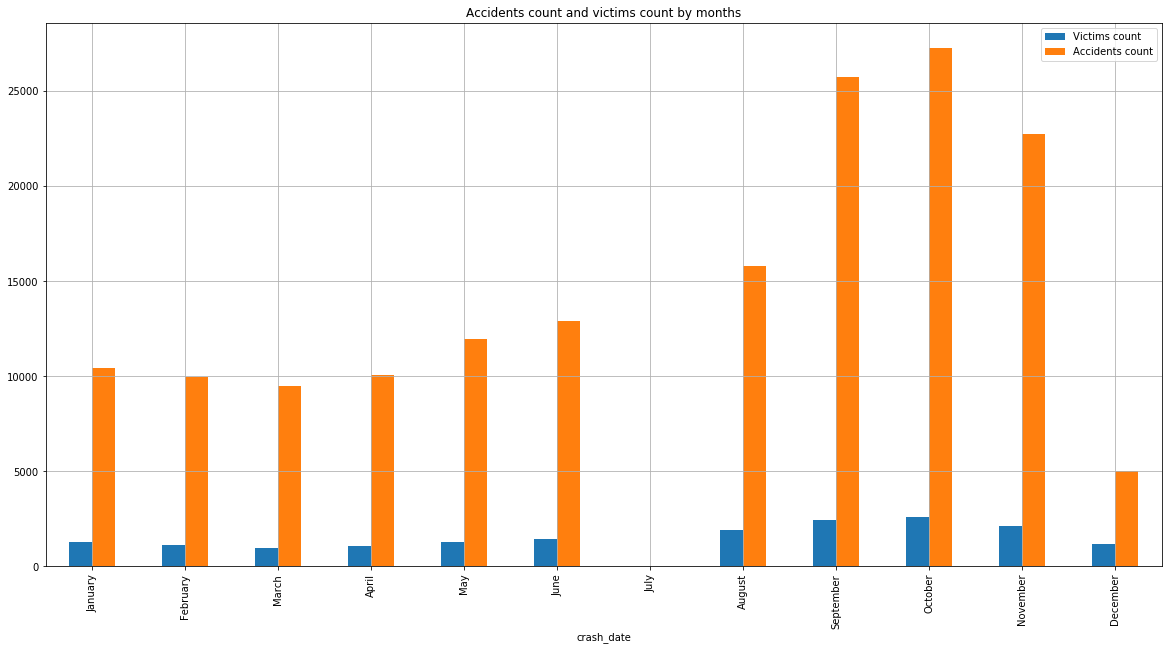

In [64]:
show_vics_count_histogram(data_2017)

*There is no info about July :(*

We can see that the most of accidents happens at Autumn (~25k/month), and ~10k/month accidens in other months, except December with ~5k accidents.

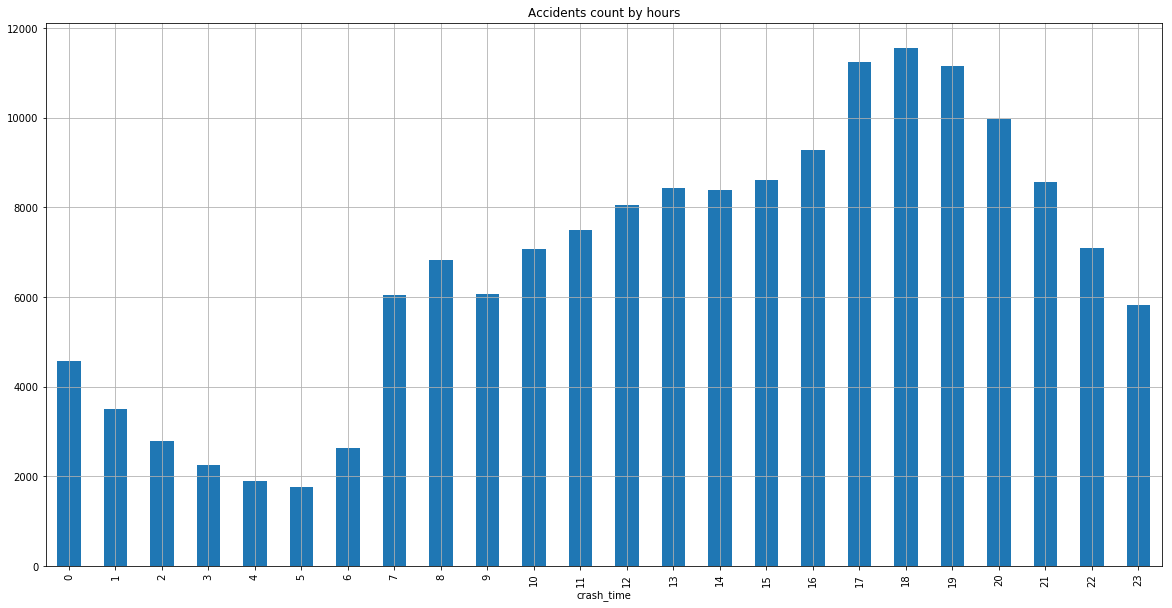

In [65]:
show_count_daily_histogram(data_2017)

The most of accidents happens around 17:00-20:00 (when people return from work), then it slowly goes down and reaches a minimum at 05:00. We can see a huge difference between 06:00 and 07:00 (people wake up and go to work). Then it slowly grows from 06:00 to 19:00.

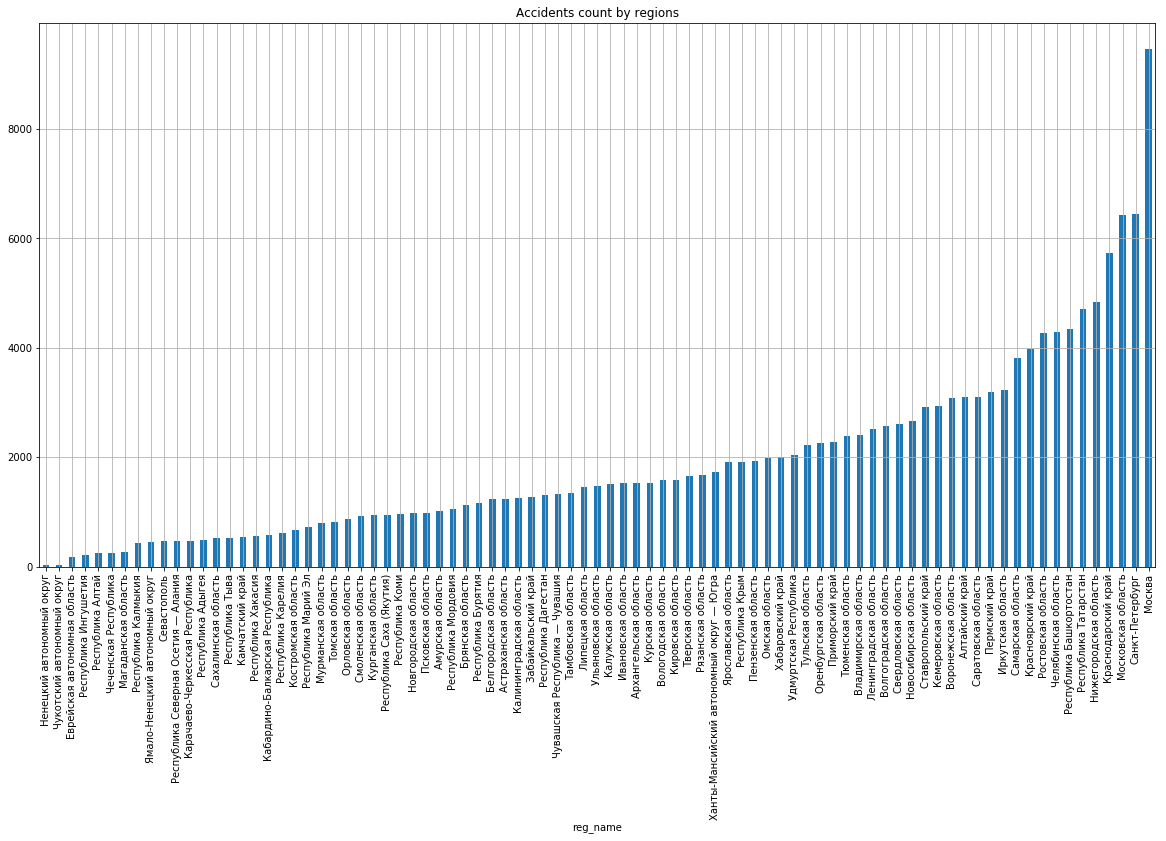

In [66]:
show_region_count_histogram(data_2017)

Most of acccidents happens in Moscow (Moscow region) and in Saint Petersburg. In these regions, the largest population density and the largest number of vehicles.

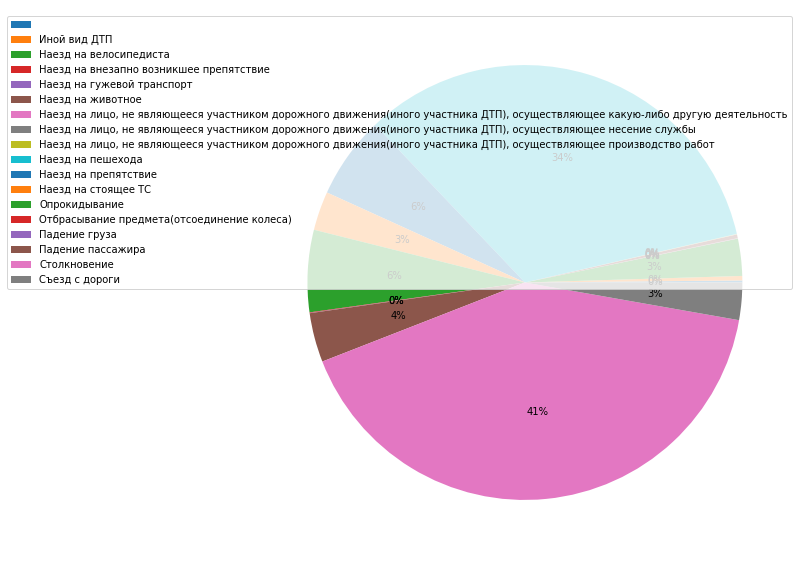

In [67]:
show_crash_type_pie(data_2017)

We can highlight the most common types of accidents: car collision (41%) and pedestrian collision (34%).

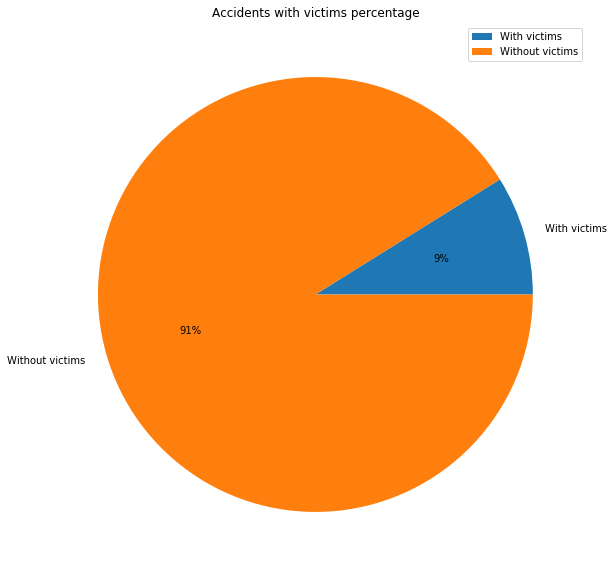

In [68]:
show_accidents_with_vic_perc_pie(data_2017)

Every tenth (9%) accident has victims.

In [ ]:
# show_map(data_2017) // works too slow with 160k markers

Map with accidents

### Year 2018

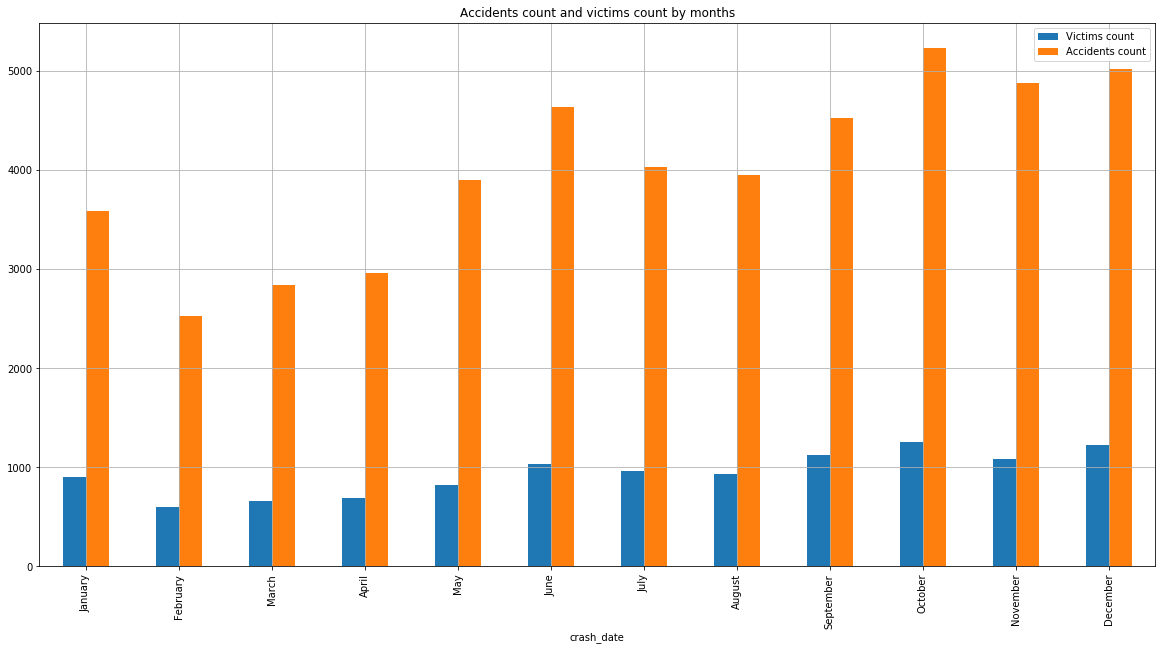

In [69]:
show_vics_count_histogram(data_2018)

Most of accidents happpens in Autumn (as well as in 2017), 

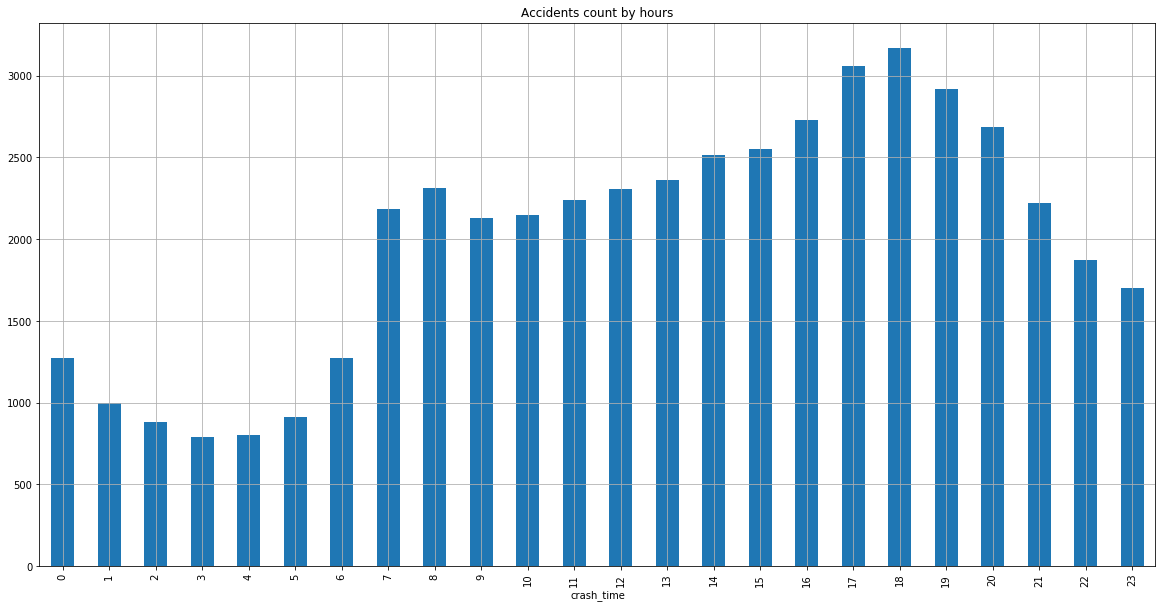

In [70]:
show_count_daily_histogram(data_2018)

Almost the same as in 2017, most of accidents happens in 17:00-20:00, then it goes down until 05:00, and starts to grow after 05:00 with a big gap at 07:00.

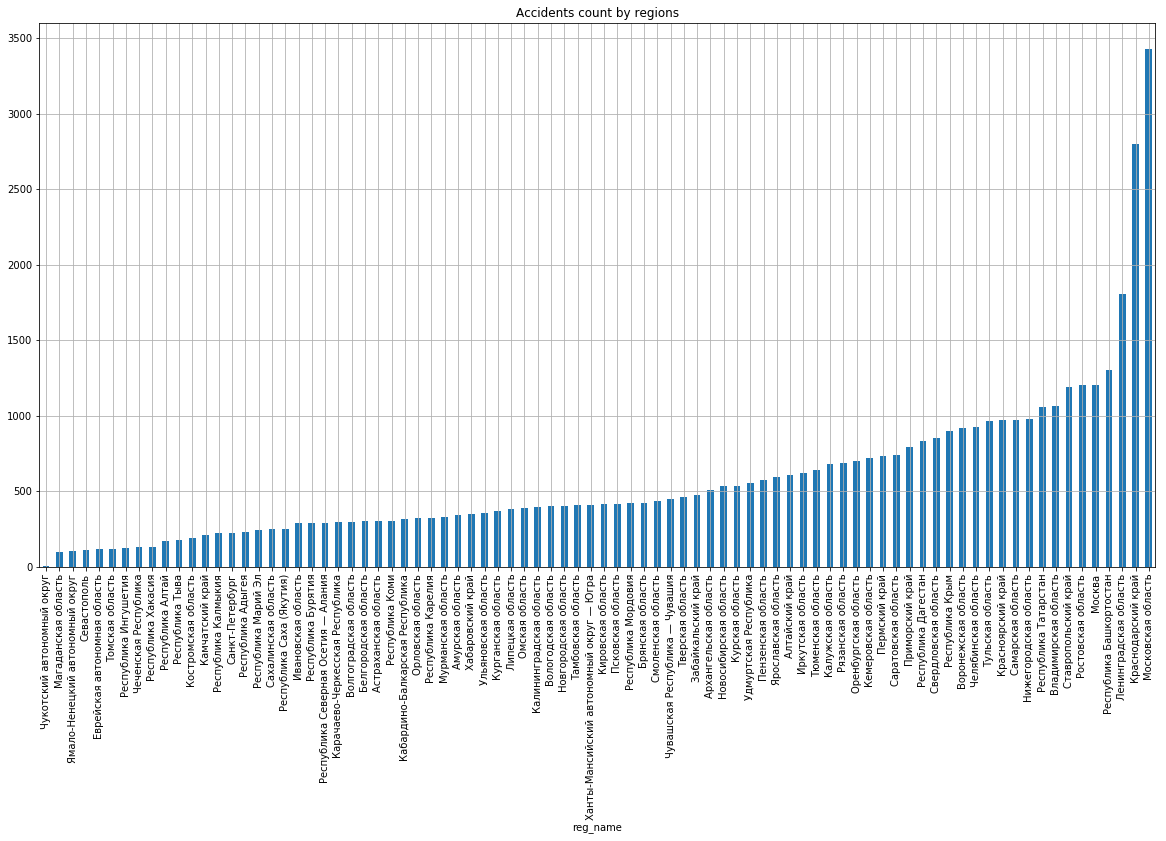

In [71]:
show_region_count_histogram(data_2018)

Most of accidents happens in Moscow, Krasnadar and Saint Petersburg.

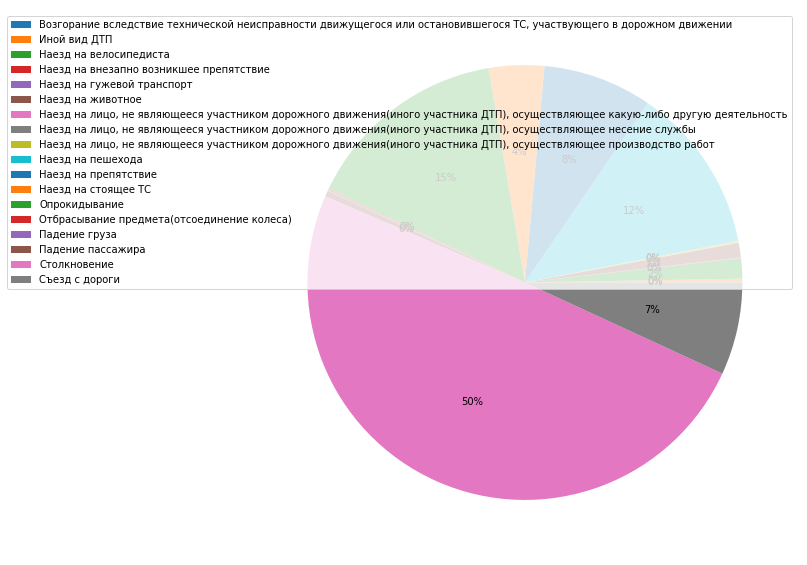

In [72]:
show_crash_type_pie(data_2018)

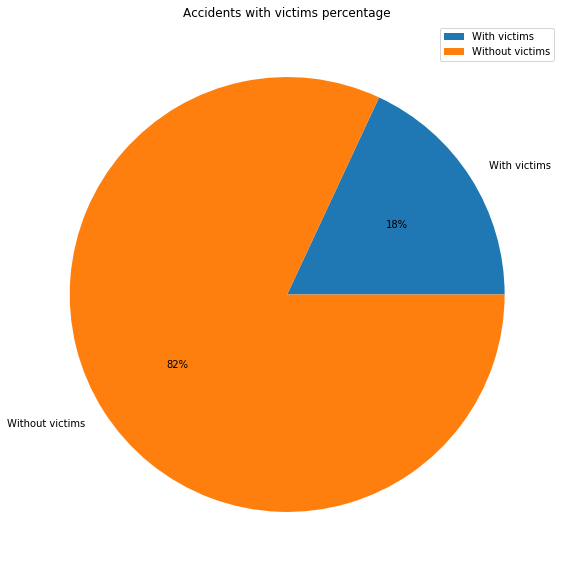

In [73]:
show_accidents_with_vic_perc_pie(data_2018)

Every 5th (18%) accident has victims.

In [74]:
show_map(data_2018)

Map(center=[65.5240097, 105.3187561], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Map on which markers are applied corresponding to the accidents in 2018, it can be seen that the vast majority occurred in the European part of the country.